Optimal number of clusters: 8


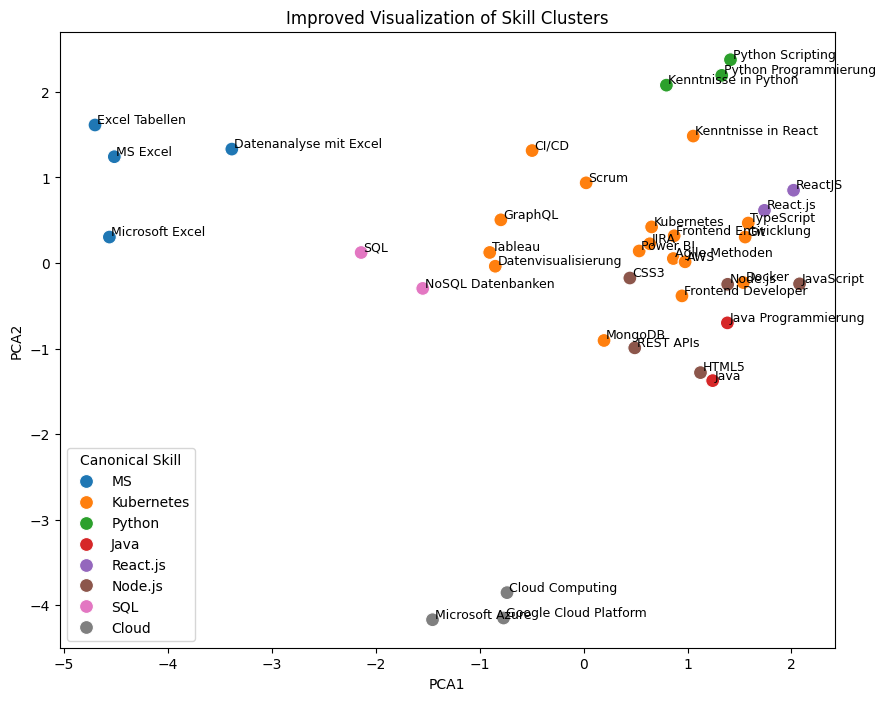

,Skill Phrase,Cluster,Canonical Skill
14,React.js,0,React.js
15,ReactJS,0,React.js
35,AWS,1,Kubernetes
31,Agile Methoden,1,Kubernetes
29,CI/CD,1,Kubernetes
6,Datenvisualisierung,1,Kubernetes
27,Docker,1,Kubernetes
13,Frontend Developer,1,Kubernetes
12,Frontend Entwicklung,1,Kubernetes
30,Git,1,Kubernetes


In [1]:
# Skill Canonicalization & Clustering

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score

# Example skill phrases extracted from job ads
raw_skills = [
    "MS Excel",
    "Microsoft Excel",
    "Excel Tabellen",
    "Datenanalyse mit Excel",
    "Power BI",
    "Tableau",
    "Datenvisualisierung",
    "Python Programmierung",
    "Python Scripting",
    "Kenntnisse in Python",
    "Java",
    "Java Programmierung",
    "Frontend Entwicklung",
    "Frontend Developer",
    "React.js",
    "ReactJS",
    "Kenntnisse in React",
    "HTML5",
    "CSS3",
    "JavaScript",
    "TypeScript",
    "Node.js",
    "MongoDB",
    "SQL",
    "NoSQL Datenbanken",
    "REST APIs",
    "GraphQL",
    "Docker",
    "Kubernetes",
    "CI/CD",
    "Git",
    "Agile Methoden",
    "Scrum",
    "JIRA",
    "Cloud Computing",
    "AWS",
    "Microsoft Azure",
    "Google Cloud Platform"
]

# Step 1: Generate sentence embeddings for skill phrases
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(raw_skills)

# Step 2: Determine optimal number of clusters
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

# Find the optimal number of clusters
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Step 3: Cluster with optimal number
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)

# Step 4: Store results in a DataFrame
df = pd.DataFrame({"Skill Phrase": raw_skills, "Cluster": labels})

# Step 5: Determine representative skills for each cluster
cluster_representatives = {}
for cluster_id in range(optimal_k):
    cluster_skills = df[df["Cluster"] == cluster_id]["Skill Phrase"].tolist()
    
    # Find the skill phrase closest to cluster center
    cluster_center = kmeans.cluster_centers_[cluster_id]
    min_distance = float('inf')
    representative = None
    
    for skill in cluster_skills:
        skill_idx = raw_skills.index(skill)
        distance = np.linalg.norm(embeddings[skill_idx] - cluster_center)
        if distance < min_distance:
            min_distance = distance
            representative = skill
    
    cluster_representatives[cluster_id] = representative

# Step 6: Assign canonical names based on representative skills
canonical_names = {
    cluster_id: name.split()[0] if len(name.split()) > 1 else name
    for cluster_id, name in cluster_representatives.items()
}

df["Representative Skill"] = df["Cluster"].map(cluster_representatives)
df["Canonical Skill"] = df["Cluster"].map(canonical_names)

# Step 7: Visualize
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)
df["PCA1"] = reduced[:, 0]
df["PCA2"] = reduced[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Canonical Skill", palette="tab10", s=100)
for i in range(df.shape[0]):
    plt.text(df.PCA1[i]+0.02, df.PCA2[i]+0.02, df["Skill Phrase"][i], fontsize=9)
plt.title("Improved Visualization of Skill Clusters")
plt.show()

# Print results
df[["Skill Phrase", "Cluster", "Canonical Skill"]].sort_values(by=["Cluster", "Skill Phrase"])